# Базовая мировая карта

In [1]:
import folium
world_map = folium.Map()
world_map

# Добавление маркера

In [3]:
coord = [61.707053, 30.699183] #Широта, долгота в градусах
map = folium.Map(location=[37.296933,-121.9574983], zoom_start = 8)
map

In [4]:
map.save("map1.html") # сохранение карты

In [4]:
import folium
pop_up = 'Я всплывающая надпись при нажатии на иконку'
map = folium.Map(location=[37.296933,-121.9574983], zoom_start = 8)
folium.Marker(location=[37.4074687,-122.086669],popup = pop_up, icon=folium.Icon(color = 'gray')).add_to(map)
icon=folium.Icon(color = 'gray').add_to(map)
map

# Дополнительные элементы : управление слоями

In [5]:
m = folium.Map(tiles=None)

folium.TileLayer("OpenStreetMap").add_to(m)
folium.TileLayer(show=False).add_to(m)

folium.LayerControl().add_to(m)

m

In [39]:
m = folium.Map()

fg = folium.FeatureGroup(name="Icon collection", show=False).add_to(m)
folium.Marker(location=(0, 0)).add_to(fg)

folium.LayerControl().add_to(m)

m

## Folium.plugins

In [12]:
world = folium.Map() # full map
from folium import plugins

draw = plugins.Draw(export=True)
draw.add_to(world)
world

# Кластеризация точек

In [6]:
import numpy as np
N = 100

EU = folium.Map(location=[45, 3],
                zoom_start=4)

points = np.array([
        np.random.uniform(low=35, high=60, size=N),
        np.random.uniform(low=-12, high=30, size=N)]).T

plugins.MarkerCluster(points).add_to(EU)
EU

NameError: name 'plugins' is not defined

# Пример на некоторых реальных данных

In [7]:
import pandas as pd
pk_data = pd.read_csv('PKTeoricos_ADIF.csv', header=0, index_col=0, dtype=str)
# чтение таблицы

In [8]:
pk_data['numeric_coords'] = pk_data['coords'].apply(lambda x: [float(n) for n in x.split(" ")]) # парсинг координат

In [9]:
aoi = pk_data[pk_data['section'] == '061600120']

In [10]:
import folium
from pyproj import Proj, transform
# Coordinates change for this area:
inProj = Proj(init='epsg:25830') # перепроцирование координат
outProj = Proj(init='epsg:4326')

d:\Project_VS_Code\flooding\.venv\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
d:\Project_VS_Code\flooding\.venv\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [11]:
m_init = False # нанесение точек на карту через цикл for
for index, point in aoi[::-1].iterrows():
    x, y = point['numeric_coords']
    x, y = transform(inProj,outProj,x,y)
    p_name = 'PK - ' + point['km_point']

    if not m_init:
        map = folium.Map(location= [y,x] , zoom_start=14, width='100%',
        height='100%')
        folium.Marker(location=[y,x], popup=p_name, icon =
        folium.Icon(color='yellow')).add_to(map)
        m_init = True
        continue

folium.Marker(location=[y,x], popup=p_name, icon = folium.Icon(color='yellow')).add_to(map)
map

C:\Temp\ipykernel_14720\314432790.py:4: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  x, y = transform(inProj,outProj,x,y)
C:\Temp\ipykernel_14720\314432790.py:11: UserWarning: color argument of Icon should be one of: {'darkgreen', 'lightgray', 'cadetblue', 'white', 'red', 'gray', 'pink', 'darkred', 'lightred', 'blue', 'darkblue', 'darkpurple', 'purple', 'beige', 'orange', 'black', 'green', 'lightblue', 'lightgreen'}.
  folium.Icon(color='yellow')).add_to(map)
C:\Temp\ipykernel_14720\314432790.py:15: UserWarning: color argument of Icon should be one of: {'darkgreen', 'lightgray', 'cadetblue', 'white', 'red', 'gray', 'pink', 'darkred', 'lightred', 'blue', 'darkblue', 'darkpurple', 'purple', 'beige', 'orange', 'black', 'green', 'lightblue', 'lightgreen'}.
  folium.Marker(location=[y,x], popup=p_name, icon = folium.Icon(color='yellow')).add_to(map)


In [47]:
 # пример добавления подложки данных ДЗЗ через сторонний сайт сервис
tile = folium.TileLayer(
      tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
      attr = 'Esri',
      name = 'Esri Satellite',
      overlay = False,
      control = True
      ).add_to(map)
map

# Доабвление геопривязанного изображения

In [9]:
m = folium.Map([37, 0], zoom_start=1)

folium.raster_layers.ImageOverlay(
    image="https://upload.wikimedia.org/wikipedia/commons/f/f4/Mercator_projection_SW.jpg",
    name="Я картинка",
    bounds=[[-82, -180], [82, 180]],
    opacity=0.8,
    interactive=False,
    cross_origin=False,
    zindex=1,
    alt="Wikipedia File:Mercator projection SW.jpg",
).add_to(m)

folium.LayerControl().add_to(m)


m

# Еще немного слов про растры

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import rasterio
import folium

In [3]:
# представление сгенерированного растра
elevRaster = rasterio.open('elevationClipped.tif')
elevArray = elevRaster.read(1)

boundList = [x for x in elevRaster.bounds]
boundList

[-98.13583333333341, 32.65666666666657, -96.40250000000015, 33.967499999999845]

In [4]:
# избавьтесь от nan
# обычно данные ДЗЗ содержат Nan значения
elevArray = np.nan_to_num(elevArray)

![image.png](attachment:image.png)

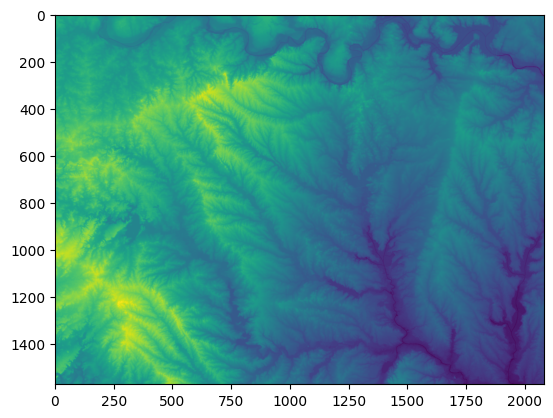

In [5]:
plt.imshow(elevArray)

In [6]:
rasLon = (boundList[3] + boundList[1])/2
rasLat = (boundList[2] + boundList[0])/2
mapCenter = [rasLon, rasLat]


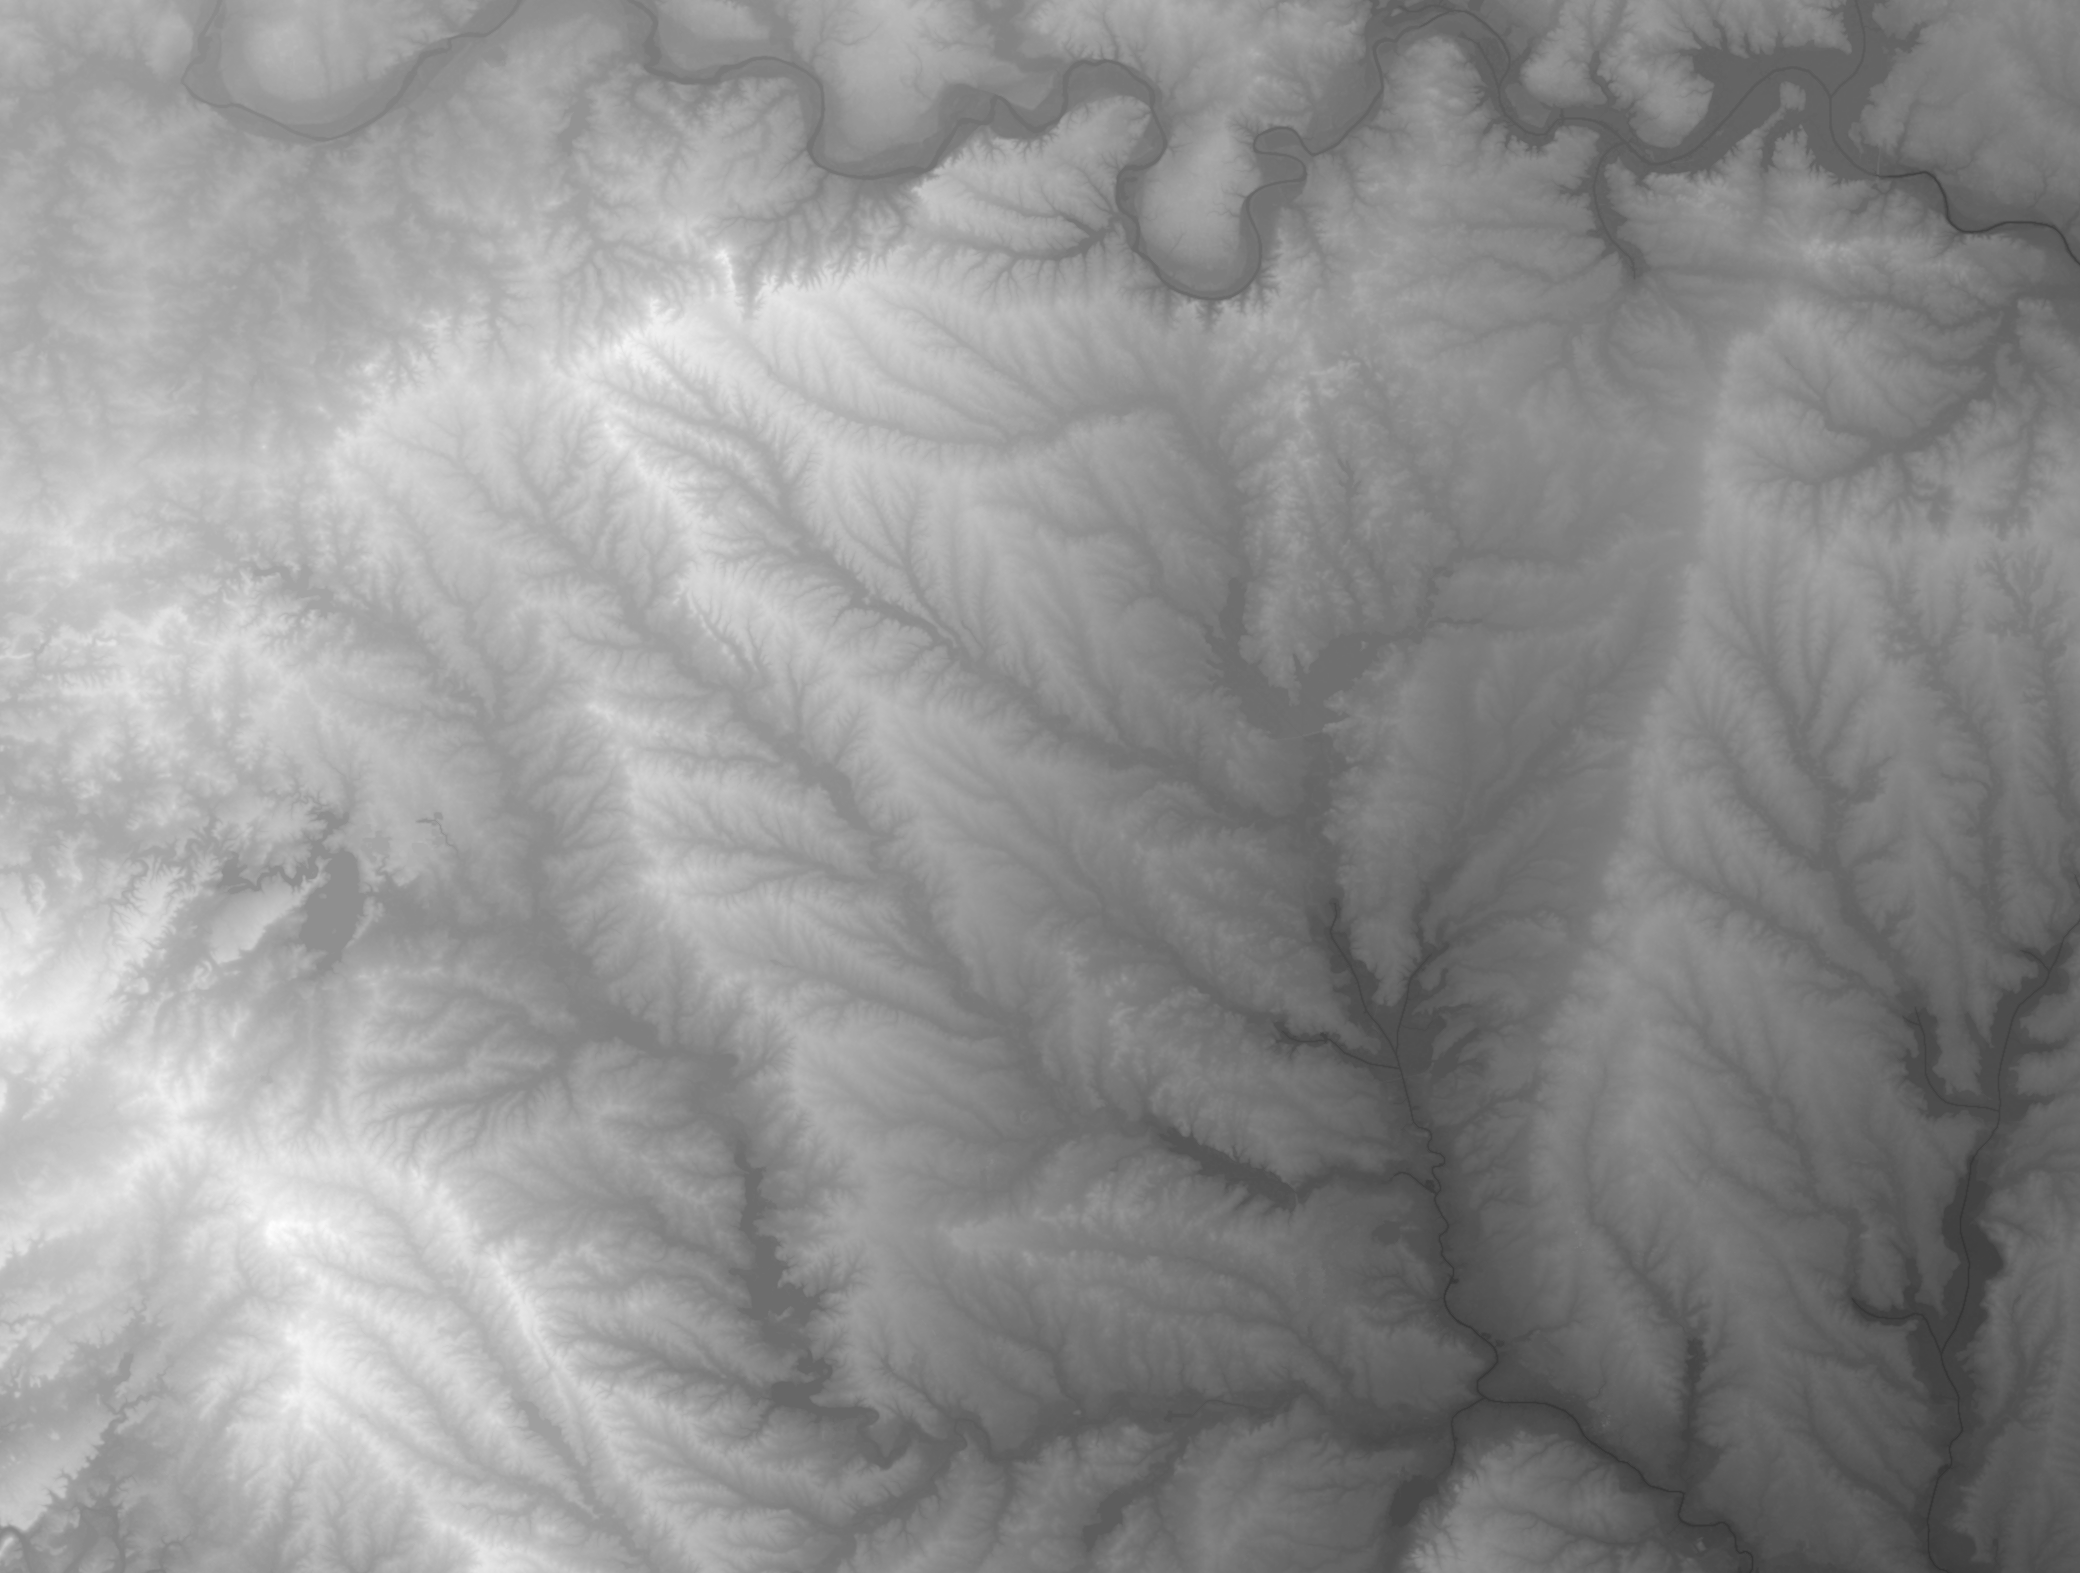

In [7]:
m = folium.Map(location=mapCenter, zoom_start=9)

image = folium.raster_layers.ImageOverlay(
    image=elevArray,
    bounds=[[boundList[1], boundList[0]], [boundList[3], boundList[2]]],
    opacity=0.8,
    interactive=True,
    cross_origin=False,
)
image.add_to(m)

folium.LayerControl().add_to(m)

m